In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from skimage.io import imread

In [2]:
train = np.load('train.npz')
x_train = train['x_train'].reshape((-1, 29* 29))
y_train = train['y_train']
# y_train = np.argmax(y_train,axis=1)
print(x_train.shape)
print(y_train.shape)

# clf1 = LogisticRegression(random_state=0,max_iter=1000000000000)
# clf1.fit(x_train, y_train)

(210704, 841)
(210704, 135)


In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential

tf.__version__

'2.6.0'

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 605305861144414102
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3665166336
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5215353893298402891
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, InputLayer
from tensorflow.keras.optimizers import Adam

# batch_size to train
batch_size = 20 * 256
# number of output classes
nb_classes = 135
# number of epochs to train
nb_epoch = 400

# number of convolutional filters to use
nb_filters = 20
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 8

model = Sequential([
    InputLayer(input_shape=(29, 29, 1)),
    Conv2D(filters=nb_filters, kernel_size=nb_conv, activation='relu'),
    MaxPool2D(pool_size=(nb_pool, nb_pool)),
    Dropout(0.5),
    Conv2D(filters=nb_filters, kernel_size=nb_conv, activation='relu'),
    MaxPool2D(pool_size=(nb_pool, nb_pool)),
    Dropout(0.25),
    Flatten(),
    Dense(units=4000, activation='relu'),
    Dense(units=nb_classes, activation='softmax'),
])
    
optimizer = Adam(learning_rate=1e-4, epsilon=1e-08)

model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])


## Train model - uncoment to perform the training yourself
#

train = np.load('train.npz')
x_train = train['x_train'].reshape((-1, 29, 29, 1))
y_train = train['y_train']

early_stopping = EarlyStopping(patience=10)
model.fit(x_train, y_train, epochs=nb_epoch, batch_size=batch_size,
                    callbacks=[early_stopping], validation_split=0.2)
model.save_weights('keras1.h5')

# ## Load the pretrained network
# model.load_weights('/content/drive/MyDrive/keras.h5')

Epoch 1/400
33/33 [==============================] - 3s 66ms/step - loss: 4.3435 - accuracy: 0.1274 - val_loss: 3.6149 - val_accuracy: 0.1151
Epoch 2/400
33/33 [==============================] - 2s 50ms/step - loss: 3.5027 - accuracy: 0.2229 - val_loss: 3.4447 - val_accuracy: 0.2792
Epoch 3/400
33/33 [==============================] - 2s 50ms/step - loss: 3.3396 - accuracy: 0.2887 - val_loss: 3.2682 - val_accuracy: 0.2996
Epoch 4/400
33/33 [==============================] - 2s 52ms/step - loss: 3.0855 - accuracy: 0.3045 - val_loss: 2.8338 - val_accuracy: 0.3116
Epoch 5/400
33/33 [==============================] - 2s 53ms/step - loss: 2.6199 - accuracy: 0.3157 - val_loss: 2.5264 - val_accuracy: 0.3334
Epoch 6/400
33/33 [==============================] - 2s 51ms/step - loss: 2.4640 - accuracy: 0.3332 - val_loss: 2.4237 - val_accuracy: 0.3513
Epoch 7/400
33/33 [==============================] - 2s 52ms/step - loss: 2.3627 - accuracy: 0.3489 - val_loss: 2.3270 - val_accuracy: 0.3579
Epoch 

In [14]:
def test2_2():
    test = np.load('test.npz')
    x_test = test['x_test']
    y_test = test['y_test']
    # print(x_test.shape)
    x_test = tf.squeeze(x_test)
    # print(x_test.shape)
    x_test = tf.expand_dims(x_test, axis=3)
    # print(x_test.shape)
    result = model.evaluate(x_test, y_test)
    print(result)
test2_2()

1317/1317 [==============================] - 2s 2ms/step - loss: 0.2597 - accuracy: 0.9201
[0.2596820890903473, 0.9201253056526184]


0.35543328748280606
0.4184219921456623
0.6490872210953347
0.7666666666666667
0.26647326978864483
0.2528370403994553
0.42455242966751916
0.0
0.8
0.07613941018766757
0.09436619718309859
0.0
0.01680672268907563
0.0
0.14925373134328357
0.3165829145728643
0.1728395061728395
0.0
0.0
0.0125
0.16062176165803108
0.20176991150442478
0.0
0.010810810810810811
0.06666666666666667
0.0981067125645439
0.23401162790697674
0.09289099526066351
0.20131567413453694
0.20131567413453694


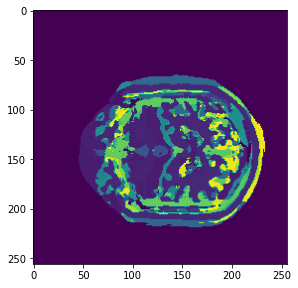

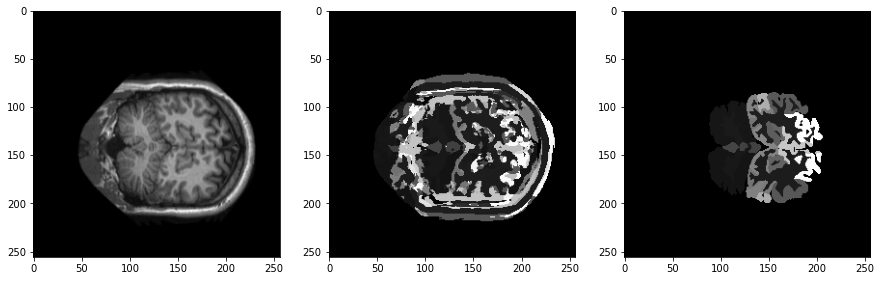

In [25]:
import tensorflow as tf
import math
def patch_image(image):
    x,y = image.shape
    image = np.pad(image, ((14,14),(14,14)), constant_values=(0,0))
    patch = np.zeros((x*y,29,29))
    for i in range(x):
        for j in range(y):
            patch[i*256+j,:,:] = image[i:29+i,j:29+j]
    patch = patch / 255
    return patch

def test2_3():
    image = imread('test_images/image/1003_3_image.png')
    image_real = imread('test_images/seg/1003_3_seg.png')

    patch = patch_image(image)
    patch = tf.expand_dims(patch, axis=3)
    patch_result = model.predict(patch) 
    patch_result = np.argmax(patch_result,axis=1)
    segmented_image = patch_result.reshape(256,256)

    plt.figure(figsize = (10, 5))
    plt.subplot(1,2,1) 
    plt.imshow(segmented_image)
    # plt.subplot(1,2,2) 
    # plt.imshow(image_real)
    return image, segmented_image,image_real

image, segmented_image,image_real = test2_3()

def dice(pred, true, k = 1):
    intersection = np.sum(pred[true==k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    if(math.isnan(dice)):
        return 0
    print(dice)
    return dice

def mean_dice(pred, true, multi_class = 135):
    total_loss = 0
    class_count = 0
    for i in range(multi_class):
        if true[true == i].sum() != 0:
            class_count += 1
            pred_k = np.where(pred == i, 1, 0)
            true_k = np.where(true == i, 1, 0)
            total_loss += dice(pred_k, true_k)
    print(total_loss/class_count)
    return total_loss / class_count

# def mean_dice(pred, true, multi_class = 135):
#     total_loss = 0
#     class_count = 0
#     for i in range(multi_class):
#         pred_k = np.where(pred == i, 1, 0)
#         true_k = np.where(true == i, 1, 0)
#         total_loss += dice(pred_k, true_k)
#         # print(total_loss)
#     print(total_loss/multi_class)
#     return total_loss / multi_class
def test2_4():
    dice_coeffect = mean_dice(segmented_image,image_real)
    plt.figure(figsize = (15, 5))
    plt.subplot(1,3,1) 
    plt.imshow(image, cmap='gray')
    plt.subplot(1,3,2) 
    plt.imshow(segmented_image, cmap='gray')
    plt.subplot(1,3,3) 
    plt.imshow(image_real, cmap='gray')
    print(dice_coeffect)
# 0.20131567413453694
test2_4()

In [12]:
def task2_4(predictions, gt):
    def _dice(gt, pred, i):
        gt = gt.flatten()
        pred = pred.flatten()
        intersection = np.count_nonzero(pred[gt==i]) * 2.
        dsc = intersection / (np.count_nonzero(pred) + np.count_nonzero(gt))
        return dsc

    def dsc_multilabel(gt, pred, n_classes=135):
        dsc = 0
        for i in range(n_classes):
            dsc += _dice(gt, pred, i)
        return dsc / n_classes
        
    return dsc_multilabel(gt, predictions)

def test2_41():
    dice_coeffect = task2_4(segmented_image,image_real)
    print(dice_coeffect)
    
test2_41()

0.01014431607098456
